###Lab 4. Program to implement Non-linear Spatial Filtering using Built-in and user defined functions.


In [ ]:
import cv2
import numpy as np
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt

array([[[203, 203, 203],
        [191, 191, 191],
        [203, 203, 203],
        ...,
        [214, 214, 214],
        [199, 199, 199],
        [192, 192, 192]],

       [[ 28,  28,  28],
        [ 69,  69,  69],
        [ 59,  59,  59],
        ...,
        [ 42,  42,  42],
        [ 48,  48,  48],
        [ 52,  52,  52]],

       [[ 68,  68,  68],
        [ 61,  61,  61],
        [ 54,  54,  54],
        ...,
        [ 52,  52,  52],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       ...,

       [[ 67,  67,  67],
        [ 15,  15,  15],
        [ 11,  11,  11],
        ...,
        [ 62,  62,  62],
        [ 59,  59,  59],
        [ 44,  44,  44]],

       [[ 31,  31,  31],
        [ 55,  55,  55],
        [ 77,  77,  77],
        ...,
        [ 47,  47,  47],
        [ 56,  56,  56],
        [ 34,  34,  34]],

       [[ 27,  27,  27],
        [ 37,  37,  37],
        [ 48,  48,  48],
        ...,
        [ 39,  39,  39],
        [ 69,  69,  69],
        [ 35,  35,  35]]], dtype=uint8)
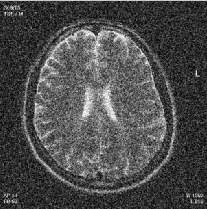

In [2]:
# Load the image
image = cv2.imread('/content/images.jpeg')
image

In [4]:
# Check if the image is loaded
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # 1. Median Filter using built-in function and user-defined function
    def median_filter_builtin(image, kernel_size=3):
        return cv2.medianBlur(image, kernel_size)

    def median_filter_user_defined(image, kernel_size=3):
        return generic_filter(image, np.median, size=kernel_size)

In [7]:
 #Max Filter using built-in function (assuming the use of dilation) and user-defined function
def max_filter_builtin(image, kernel_size=3):
  return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

def max_filter_user_defined(image, kernel_size=3):
  return generic_filter(image, np.max, size=kernel_size)


In [8]:
# Min Filter using built-in function (assuming the use of erosion) and user-defined function
def min_filter_builtin(image, kernel_size=3):
  return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter_user_defined(image, kernel_size=3):
  return generic_filter(image, np.min, size=kernel_size)


In [9]:
# Midpoint Filter using a user-defined function
def midpoint_filter_user_defined(image, kernel_size=3):
  def midpoint(values):
    return (np.max(values) + np.min(values)) / 2
  return generic_filter(image, midpoint, size=kernel_size)


In [10]:
 # Alpha-Trimmed Mean Filter using a user-defined function

def alpha_trimmed_mean_filter_user_defined(image, kernel_size=3, d=2):
    """
    Applies an alpha-trimmed mean filter.
    :param image: Input grayscale image
    :param kernel_size: Size of the filtering kernel (3, 5, etc.)
    :param d: Number of elements to trim from each end
    """
    def alpha_trimmed_mean(values):
        sorted_values = np.sort(values)
        trimmed_values = sorted_values[d // 2: -d // 2]
        return np.mean(trimmed_values)

    return generic_filter(image, alpha_trimmed_mean, size=kernel_size)


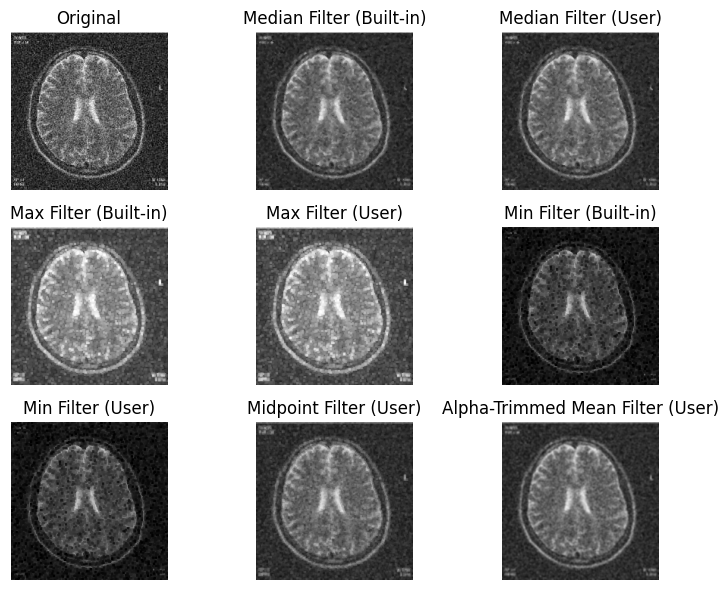

In [13]:
import matplotlib.pyplot as plt

# Apply each filter and display results
median_filtered_builtin = median_filter_builtin(image)
median_filtered_user_defined = median_filter_user_defined(image)
max_filtered_builtin = max_filter_builtin(image)
max_filtered_user_defined = max_filter_user_defined(image)
min_filtered_builtin = min_filter_builtin(image)
min_filtered_user_defined = min_filter_user_defined(image)
midpoint_filtered_user_defined = midpoint_filter_user_defined(image)
alpha_trimmed_filtered_user_defined = alpha_trimmed_mean_filter_user_defined(image, d=2)

# Display the results
filters = [
    image, median_filtered_builtin, median_filtered_user_defined,
    max_filtered_builtin, max_filtered_user_defined,
    min_filtered_builtin, min_filtered_user_defined,
    midpoint_filtered_user_defined, alpha_trimmed_filtered_user_defined
]
titles = [
    "Original", "Median Filter (Built-in)", "Median Filter (User)",
    "Max Filter (Built-in)", "Max Filter (User)",
    "Min Filter (Built-in)", "Min Filter (User)",
    "Midpoint Filter (User)", "Alpha-Trimmed Mean Filter (User)"
]

plt.figure(figsize=(8, 6))
for i in range(len(filters)):
    plt.subplot(3, 3, i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
